# Database Fundamentals and Applications &ndash; Group Assignment 3

In this assignment you will use SQL code to query `Yelp` from Python. You will use the SQL results to carry out several statistical analyses. You will be asked to discuss the results&mdash;**keep your answers brief; there is no need to write more than 2&ndash;4 sentences when interpreting results**.

Documentation of the dataset can be found in the main PDF (`E_EOR2_DBFA.GA3.pdf`) with instructions, found on Canvas.

## Getting started

### Connect Python to MySQL

Before Python can connect to your MySQL Server, you need to install the MySQL-Python connector. Run the code below to install this connector.

In [1]:
# install mysql connector
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 10.8 MB/s eta 0:00:0000:010:01


Please run the cell below to load all the necessary packages for this assignment. 

In [3]:
# import packages
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sma
%matplotlib inline

Use the code below to make a connection to the database on your local MySQL Server. **Do not forget to enter your password in the code below!**

In [5]:
# connect to Yelp
connection = mysql.connector.connect(host = "localhost",
                                     user = "root",
                                     password = "ttNd99fw", # do not forget to enter your password!
                                     db = "Yelp")

**If you run into errors executing the code above, try restaring the kernel**: in the 'Kernel' menu, click 'Restart'. If this does not help, try installing the newest MySQL-Python connector from https://dev.mysql.com/downloads/connector/python/8.0.html. Do not forget to restart the kernel after installation.

### Using Pandas' read_sql_query() to extract data from MySQL

In this assignment, we recommend you mix SQL statements with the functionalities of Python's Pandas package as well as a few other packages to extract, clean, and reshape data. The code below demostrates how to execute a SQL statement using Pandas, and extract a DataFrame.

In [124]:
# select first 10k rows from Businesses
data = pd.read_sql_query("SELECT * \
                          FROM Businesses \
                          LIMIT 10000",
                         connection)
# let's inspect the data
data.head()

/var/folders/g7/zwq0_rkx69s36_nrdsxf6rnm0000gn/T/ipykernel_63039/1973843063.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("SELECT * \


,business_id,name,address,city,state,postal_code,latitude,longitude,is_open,attributes,categories
0,__1uG7MLxWGFIv2fCGPiQQ,SpinalWorks Chiropractic,"15640 N 7th St, Ste A3",Phoenix,AZ,85022,33.6289,-112.0660,1,"""{'AcceptsInsurance': 'True', 'ByAppointmentOn...","Physical Therapy, Health & Medical, Chiropractors"
1,__3I-DDkqM9XjLH1cJl3VA,Montallegro Barber Shop,7244 Rue Hutchison,Montreal,QC,H3N 1Z1,45.5299,-73.6237,1,"""{'GoodForKids': 'True', 'BusinessParking': \""...","Barbers, Hair Salons, Beauty & Spas"
2,__3qOwWFBUE8mdOToI7YrQ,Custom Kings,None,Las Vegas,NV,88901,36.0557,-115.1690,1,"""{'BusinessAcceptsCreditCards': 'True', 'BikeP...","Fashion, Local Services, Shopping, Men's Cloth..."
3,__47_7H-yK3HChO5vyut_Q,Instant Muffler and Autorepair,395 Rexdale Boulevard,Etobicoke,ON,M9W 1R9,43.7152,-79.5893,1,null,"Auto Repair, Automotive"
4,__8j8yhsmE98wNWHJNyAgw,Urawa Sushi,254 Adelaide Street W,Toronto,ON,M5H 1X6,43.6482,-79.3893,1,"""{'GoodForKids': 'True', 'Alcohol': \""'beer_an...","Japanese, Restaurants, Sushi Bars"


If everything works as it is supposed to, you should now see a table with 11 columns. Now you are ready to start the actual work on Group Assignment 3!

## Part 1

You have been asked to provide an overview of the reviews left by Yelp users. In particular, we are interested to investigate:

1.1 the number of reviews left in January, February, etc., aggregated across all years;

1.2 the evolution over time, of the number of reviews left per month;

1.3 difference in average star rating of reviews left in the morning, afternoon, evening, and at night; and

1.4 the relationship between number of reviews left by a user and how many stars they tend to give.

### 1.1 Number of reviews left in January, February, etc. (1 point)

- SQL: Write a SELECT statement that counts the number of reviews left in each month, aggregated across all years. So how many reviews have been left in January across all years, in February across all years, etc. Use SQL's `MONTH()` function to convert the timestamp in attribute `date` to a number beween 1 and 12, where 1 corresponds to January and 12 to December, and use this number to group by, and to order by.
- Python: Execute the SQL query. Visualise the data in the resulting DataFrame using a bar plot.
- Comment on the results: In which month are most reviews left? And in which month the fewest?

In [125]:
# extract required data
reviews_by_month = pd.read_sql_query("SELECT MONTH(date) as Month, COUNT(*) as count \
                          FROM Reviews \
                          GROUP BY Month ORDER BY Month",
                          connection)

/var/folders/g7/zwq0_rkx69s36_nrdsxf6rnm0000gn/T/ipykernel_63039/2780390216.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  reviews_by_month = pd.read_sql_query("SELECT MONTH(date) as Month, COUNT(*) as count \


/Users/lshyshova/.conda/envs/db3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lshyshova/.conda/envs/db3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lshyshova/.conda/envs/db3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Month', ylabel='count'>

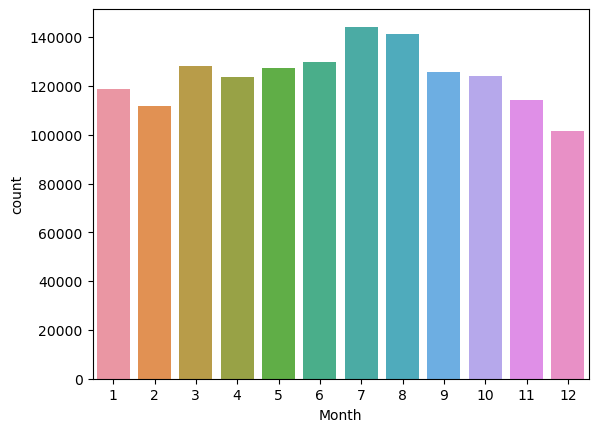

In [126]:
# visualise the results with a barplot, with stars (x-axis) and counts (y-axis)
sns.barplot(data = reviews_by_month,
           x = "Month",
           y = "count")

**Your discussion:**
Across all years least of all reviews are left in December and most is left in July.

### 1.2 Evolution of reviews per month over time (1 point)

- SQL: Write a SELECT statement that counts the number of reviews left in each month of each year. Use SQL's `MONTH()` and `YEAR()` functions to convert the timestamp in attribute `date` to a month and year attribute (both as a number). Group and order by these two attributes. Think carefully about the order of appearance: should you first order by year and then by month? Or the other way around?
- Python: Execute the SQL query. Visualise the data in the resulting DataFrame using a line plot.
- Comment on the results: How are the number of monthly reviews developing over time? And do you see the same seasonalities as in the previous question?

In [127]:
# extract required data
reviews_by_month_and_year = pd.read_sql_query("SELECT YEAR(date) as year, MONTH(date) as month, COUNT(*) as count \
                          FROM Reviews \
                          GROUP BY year, month ORDER BY year, month",
                          connection)

/var/folders/g7/zwq0_rkx69s36_nrdsxf6rnm0000gn/T/ipykernel_63039/2699611231.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  reviews_by_month_and_year = pd.read_sql_query("SELECT YEAR(date) as year, MONTH(date) as month, COUNT(*) as count \


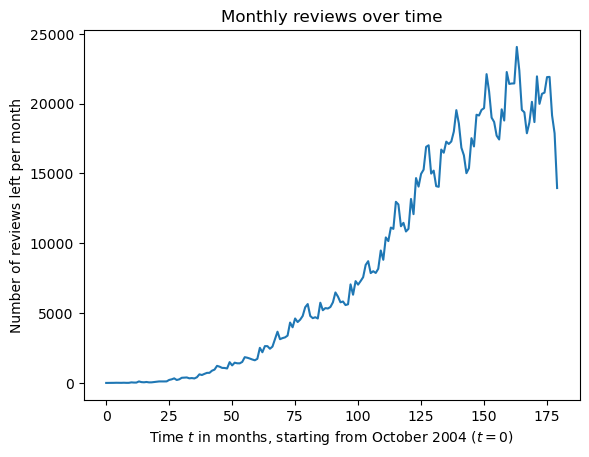

In [128]:
# visualise the results with a line plot, with stars (x-axis) and counts (y-axis)
plt.plot(reviews_by_month_and_year["count"])
plt.title("Monthly reviews over time")
plt.xlabel("Time $t$ in months, starting from October 2004 ($t=0$)")
plt.ylabel("Number of reviews left per month")
plt.show()

**Your discussion:**
We can see a steady increase in number of reviews left over time. At the beginning some month didn't even have any reviews at all.
And in 10 years monthly level of reviews surpassed 10.000.
Yes, the same seasonality as in previous question can be seen, with peak around July and decrease until the end of the end of the year.

### 1.3 Average star rating of reviews left in the morning, afternoon, evening, and at night (2 points)

- SQL: Write a SELECT statement that returns for each review the number of `stars` as well as another attribute called `daypart` which equals 'Night' in case the review was left before 06:00, 'Morning' if left before '12:00', 'Afternoon' if left before '18:00', and 'Evening' otherwise. You may find a `CASE WHEN END` statement and `HOUR()` useful to carry out this task.
- Python: Execute the SQL query. Transform the `daypart` column into a set of four dummy variables. Choose 'Morning' as base category. Regress `stars` on an intercept and the dummies for 'Afternoon', 'Evening', and 'Night'. Report the coefficient and their *t*-test statistics.
- Comment on the results: Are the differences across parts of the day different? When are the most favourable reviews left? And when the least favourable?

In [129]:
# extract the required data
data = pd.read_sql_query("SELECT stars, \
                         CASE \
                            WHEN HOUR(date) < 6 THEN 'Night' \
                            WHEN HOUR(date) < 12 THEN 'Morning' \
                            WHEN HOUR(date) < 18 THEN 'Afternoon' \
                            ELSE 'Evening' \
                         END AS daypart \
                         FROM Reviews",
                         connection)

/var/folders/g7/zwq0_rkx69s36_nrdsxf6rnm0000gn/T/ipykernel_63039/1986781002.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("SELECT stars, \


In [130]:
# create dummies from the daypart attribute
dummies = pd.get_dummies(data["daypart"], dtype=int)
# regress stars on 3 out of 4 dummies and the intercept
model = sma.OLS(data["stars"], sma.add_constant(dummies[["Afternoon", "Evening", "Night"]])).fit()
# report the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     164.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          8.04e-107
Time:                        15:46:21   Log-Likelihood:            -2.7082e+06
No. Observations:             1490000   AIC:                         5.416e+06
Df Residuals:                 1489996   BIC:                         5.416e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6100      0.004    802.752      0.0

**Your discussion:**

Using the const value (3.61) from the regression that represents the average rating in the morning we can say that the least favourable reviews are given in the morning.
In all other parts of the day we can see that rating is increasing, with the best ratings given in the evening. Though the difference between afternoon, evening and night is not that big.

### 1.4 Relationship between number of reviews and stars (1 point)

- SQL: Write a SELECT statement that, for each review, returns `stars`, as well as the total number of reviews written by the user who left that particular review. Hint: use a window function. Exclude users that joined less than a year before the user that was latest to join as a reviewer. Users that have never left a review should also be ignored. 
- Python: Execute the SQL query. **Warning!** Due to the size of data, this query can easily take up to 15 minutes to run. Use a pie chart to visualise the star distribution among users that have left only 1 review. Create the same type of pie chart for users that have left 10 or more reviews.
- Comment on the result: What main differences do you see between the two pie charts?

In [131]:
data = pd.read_sql_query("select \
                            review_id, \
                            stars, \
                            count(*) over (partition by user_id) as no_reviews\
                         from reviews\
                         where user_id in (\
                            select user_id from users \
                            where joined < (select DATE_SUB(max(joined), INTERVAL 1 YEAR) \
                            from users \
                         ) \
                         )",
                         connection)

/var/folders/g7/zwq0_rkx69s36_nrdsxf6rnm0000gn/T/ipykernel_63039/3001760878.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("select \


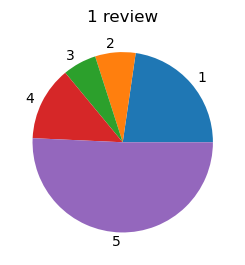

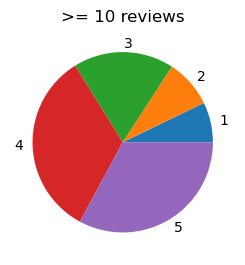

In [132]:
# create the two pie charts
data_1_review = data[data.no_reviews == 1]
data_1_grouped = data_1_review.groupby("stars").count().reset_index()
data_10_reviews = data[data.no_reviews >= 10]
data_10_grouped = data_10_reviews.groupby("stars").count().reset_index()

plt.subplot(1, 2, 1)
plt.pie(x = data_1_grouped.no_reviews, labels = data_1_grouped.stars)
plt.title("1 review")
plt.show()

plt.subplot(1, 2, 2)
plt.pie(x = data_10_grouped.no_reviews, labels = data_10_grouped.stars)
plt.title(">= 10 reviews")
plt.show()

**Your discussion:**
From the pie chart we can see that users who write their first review mostly do it when they are happy with the product or super unhappy writing most 5-star and 1-star reviews.
Users who are writing reviews more regularly and have 10 or more reviews less frequently write 1-star reviews and mostly leave their feedback when they are happy or almost happy with the product (4- and 5-star reviews).

## Part 2

You are now asked to provide an overview of businesses and their categories. In particular, we are interested to see
- the most common business categories,
- the distribution of average star rating per category, and
- if there are any significant differences between categories in terms of star rating.

### 2.1 Top categories (2 points)

- SQL: Write a SELECT statement that returns the categories column from the Businesses table. To cut down on the amount of data, randomly sample around 5% of the data in this table. For this sampling, you may find this useful: https://phpfog.com/select-random-sample-records-mysql/. Make sure to remove rows with missing categories values.
- Python: Execute the SQL query. The categories column has a list of categories that each business falls under. Extract every category name from each row list and store it in one big list. Display the 5 most common categories and their counts. Here, you might find these links useful: https://www.w3schools.com/python/ref_string_split.asp; https://docs.python.org/3/library/collections.html#collections.Counter.most_common.

In [ ]:
# extract the required data


In [ ]:
# extract separate categories from categories list column


In [ ]:
# give counts of the 5 most common categories


### 2.2 Review differences between top categories (2 points)

- SQL: Write a SELECT statement that returns an average rating of each business. Create an extra column that returns only one category based on what is contained in the categories column list. The five categories that interest us are (sorted from most to least important): (1) 'Restaurants', (2) 'Shopping', (3) 'Food', (4) 'Home Services', (5) 'Beauty & Spas'. E.g. if the list of the categories column includes the word 'Restaurants' your column should return only 'Restaurants' and ignore any other categories in the list. If, for example, the categories list contains ['Shopping', 'Food', 'Restaurants'] your column should only return 'Restaurants'. You may find the LIKE and CASE WHEN statements useful to carry out the task. Businesses that have less than 5 reviews or do not fall into any category we are interested in should be ignored.
- Python: Execute the SQL query. **Warning!** Due to the size of data, this query can easily take up to 15 minutes to run. Visualise the distribution of average star reviews for each category in seperate plots. Describe what you observe.

In [ ]:
# extract the required data


In [ ]:
# visualise the distribution of average star rating with 5 separate histograms (for each category)


**Your discussion:**

### This brings us to the end of Group Assignment 3. Do not forget to save your Jupyter Notebook!